# LIBRARIES

In [28]:
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns
import talib as talib

plt.rcParams["figure.figsize"] = (30,10)

# DATA PREPERATION

## Main Dataset (Past Values of BTC-USD)

### Import

In [29]:
past_vals_df = yf.download(tickers='BTC-USD', start="2021-01-01", end="2022-01-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


### First Glance

In [30]:
past_vals_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344


In [31]:
past_vals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,366.0,4.735140e+04,9.875143e+03,2.884157e+04,3.815712e+04,4.779085e+04,5.616867e+04,6.754973e+04
High,366.0,4.870967e+04,9.884216e+03,2.924488e+04,3.965388e+04,4.917505e+04,5.776694e+04,6.878962e+04
Low,366.0,4.580378e+04,9.841145e+03,2.820199e+04,3.613173e+04,4.666805e+04,5.428218e+04,6.638206e+04
Close,366.0,4.738656e+04,9.821604e+03,2.900172e+04,3.820150e+04,4.774742e+04,5.618702e+04,6.756683e+04
Adj Close,366.0,4.738656e+04,9.821604e+03,2.900172e+04,3.820150e+04,4.774742e+04,5.618702e+04,6.756683e+04
Volume,366.0,4.715465e+10,2.470169e+10,1.878799e+10,3.240778e+10,4.062716e+10,5.810540e+10,3.509679e+11


In [32]:
past_vals_df.isnull().values.any()

False

### Visualization

<AxesSubplot:title={'center':'BTC values in between 2021-01-01 and 2022-01-01'}, xlabel='Date'>

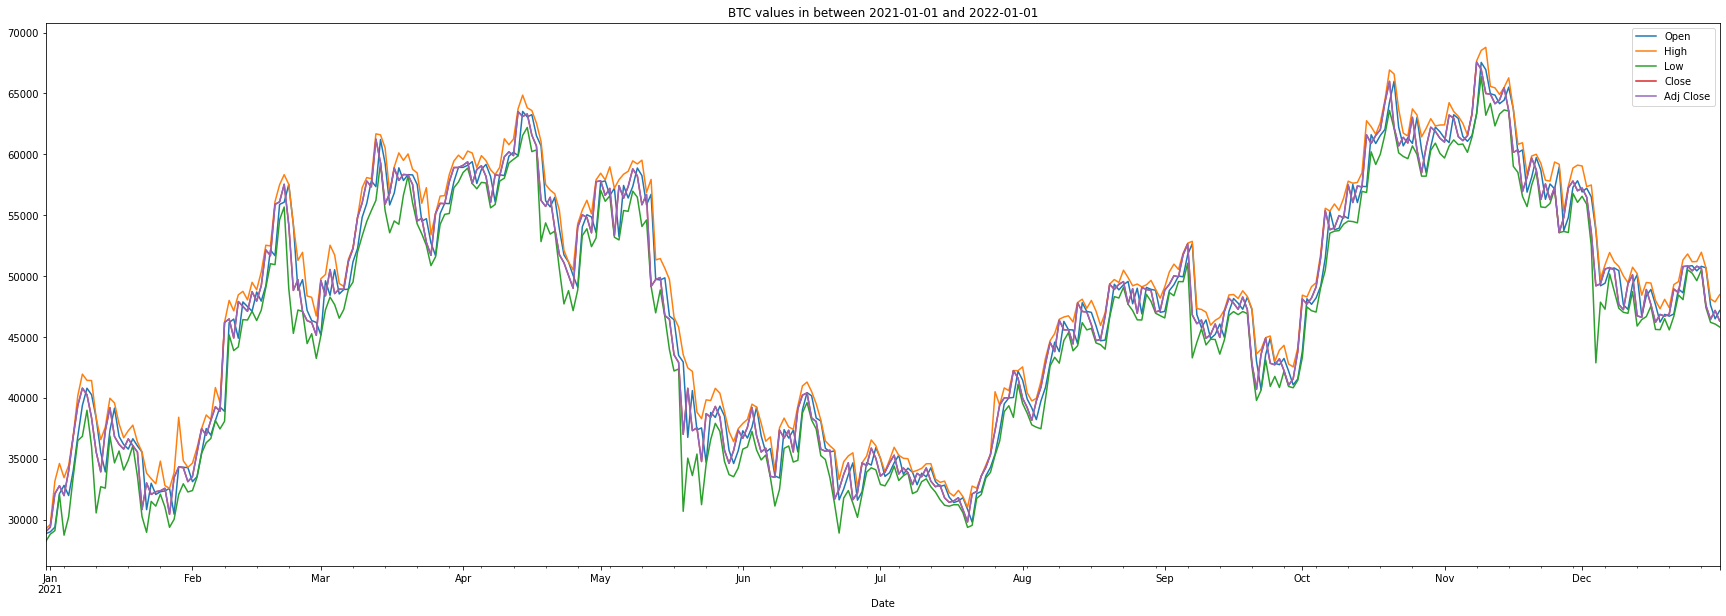

In [33]:
# To visualize the dataset better, drop "Volume"
past_vals_df.drop(["Volume"], axis = 1, inplace = False).plot(title = "BTC values in between 2021-01-01 and 2022-01-01")

### Finalize

In [34]:
df = past_vals_df.drop(columns = ["Adj Close"], axis = 1)

## Indicators

In [35]:
class indicators():
    def __init__(self):
        self.cols = []        
    
    def get_cols(self):
        return self.cols
    
    def del_from_df(self, df):
        df.drop(columns = self.cols, axis = 1, inplace = True)
        
class trend_indicators(indicators):    
    def __init__(self):
        self.cols = ["upperband", "middleband", "lowerband", "dema", "ema", "ht_trendline",
                     "kama", "ma", "midpoint", "midprice", "psar", "sma", "t3", "tema", "trima", "wma"]

    def add_to_df(self, df):
        open, close, high, low, volume = df["Open"], df["Close"], df["High"], df["Low"], df["Volume"]
        df["upperband"], df["middleband"], df["lowerband"] = talib.BBANDS(
            close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
        df["dema"] = talib.DEMA(close, timeperiod=30)
        df["ema"] = talib.EMA(close, timeperiod=30)
        df["ht_trendline"] = talib.HT_TRENDLINE(close)
        df["kama"] = talib.KAMA(close, timeperiod=30)
        df["ma"] = talib.MA(close, timeperiod=30, matype=0)
        df["midpoint"] = talib.MIDPOINT(close, timeperiod=14)
        df["midprice"] = talib.MIDPRICE(high, low, timeperiod=14)
        df["psar"] = talib.SAR(high, low, acceleration=0.02, maximum=0.02)
        df["sma"] = talib.SMA(close, timeperiod=30)
        df["t3"] = talib.T3(close, timeperiod=5, vfactor=0)
        df["tema"] = talib.TEMA(close, timeperiod=30)
        df["trima"] = talib.TRIMA(close, timeperiod=30)
        df["wma"] = talib.WMA(close, timeperiod=30)                
        
class momentum_indicators(indicators):    
    def __init__(self):
        self.cols = ["adx", "adxr", "apo", "aroondown", "aroonup", "aroonosc", "bop", "cci", "cmo", "dx", "macd", "macdsignal",
                     "macdhist", "mfi", "minus_di", "minus_dm", "mom", "plus_di", "plus_dm", "ppo", "roc", "rocp", "rocr", "roc100", "rsi", "stoch_slowk",
                     "stoch_slowd", "stochf_fastk", "stochf_fastd", "stochrsi_fastk", "stochrsi_fastd", "trix", "ultosc", "willr"]

    def add_to_df(self, df):
        open, close, high, low, volume = df["Open"], df["Close"], df["High"], df["Low"], df["Volume"]
        df["adx"] = talib.ADX(high, low, close, timeperiod=14)
        df["adxr"] = talib.ADXR(high, low, close, timeperiod=14)
        df["apo"] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
        df["aroondown"], df["aroonup"] = talib.AROON(high, low, timeperiod=14)
        df["aroonosc"] = talib.AROONOSC(high, low, timeperiod=14)
        df["bop"] = talib.BOP(open, high, low, close)
        df["cci"] = talib.CCI(high, low, close, timeperiod=14)
        df["cmo"] = talib.CMO(close, timeperiod=14)
        df["dx"] = talib.DX(high, low, close, timeperiod=14)
        df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
            close, fastperiod=12, slowperiod=26, signalperiod=9)
        df["mfi"] = talib.MFI(high, low, close, volume, timeperiod=14)
        df["minus_di"] = talib.MINUS_DI(high, low, close, timeperiod=14)
        df["minus_dm"] = talib.MINUS_DM(high, low, timeperiod=14)
        df["mom"] = talib.MOM(close, timeperiod=10)
        df["plus_di"] = talib.PLUS_DI(high, low, close, timeperiod=14)
        df["plus_dm"] = talib.PLUS_DM(high, low, timeperiod=14)
        df["ppo"] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
        df["roc"] = talib.ROC(close, timeperiod=10)
        df["rocp"] = talib.ROCP(close, timeperiod=10)
        df["rocr"] = talib.ROCR(close, timeperiod=10)
        df["roc100"] = talib.ROCR100(close, timeperiod=10)
        df["rsi"] = talib.RSI(close, timeperiod=14)
        df["stoch_slowk"], df["stoch_slowd"] = talib.STOCH(
            high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
        df["stochf_fastk"], df["stochf_fastd"] = talib.STOCHF(
            high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
        df["stochrsi_fastk"], df["stochrsi_fastd"] = talib.STOCHRSI(
            close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
        df["trix"] = talib.TRIX(close, timeperiod=30)
        df["ultosc"] = talib.ULTOSC(
            high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
        df["willr"] = talib.WILLR(high, low, close, timeperiod=14)
    
class volume_indicators(indicators):
    def __init__(self):
        self.cols = ["ad", "adosc", "obv"]

    def add_to_df(self, df):
        open, close, high, low, volume = df["Open"], df["Close"], df["High"], df["Low"], df["Volume"]
        df["ad"] = talib.AD(high, low, close, volume)
        df["adosc"] = talib.ADOSC(
            high, low, close, volume, fastperiod=3, slowperiod=10)
        df["obv"] = talib.OBV(close, volume)
        
class volatility_indicators(indicators):
    def __init__(self):
        self.cols = ["atr", "natr", "trange"]

    def add_to_df(self, df):
        open, close, high, low, volume = df["Open"], df["Close"], df["High"], df["Low"], df["Volume"]
        df["atr"] = talib.ATR(high, low, close, timeperiod=14)
        df["natr"] = talib.NATR(high, low, close, timeperiod=14)
        df["trange"] = talib.TRANGE(high, low, close)


# EXAMINATION

In [36]:
def prep_corr():
    global corr_trend, corr_momentum, corr_volume, corr_volatility
    ti = trend_indicators()
    ti.add_to_df(df)
    corr_trend = df.corr()
    ti.del_from_df(df)
    
    mi = momentum_indicators()
    mi.add_to_df(df)
    corr_momentum = df.corr()
    mi.del_from_df(df)
    
    vlmi = volume_indicators()
    vlmi.add_to_df(df)
    corr_volume = df.corr()
    vlmi.del_from_df(df)
    
    vli = momentum_indicators()
    vli.add_to_df(df)
    corr_volatility = df.corr()
    vli.del_from_df(df)
    
prep_corr()

In [37]:
non_indicators = df.columns
non_indicators

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## Trend Indicators

<AxesSubplot:>

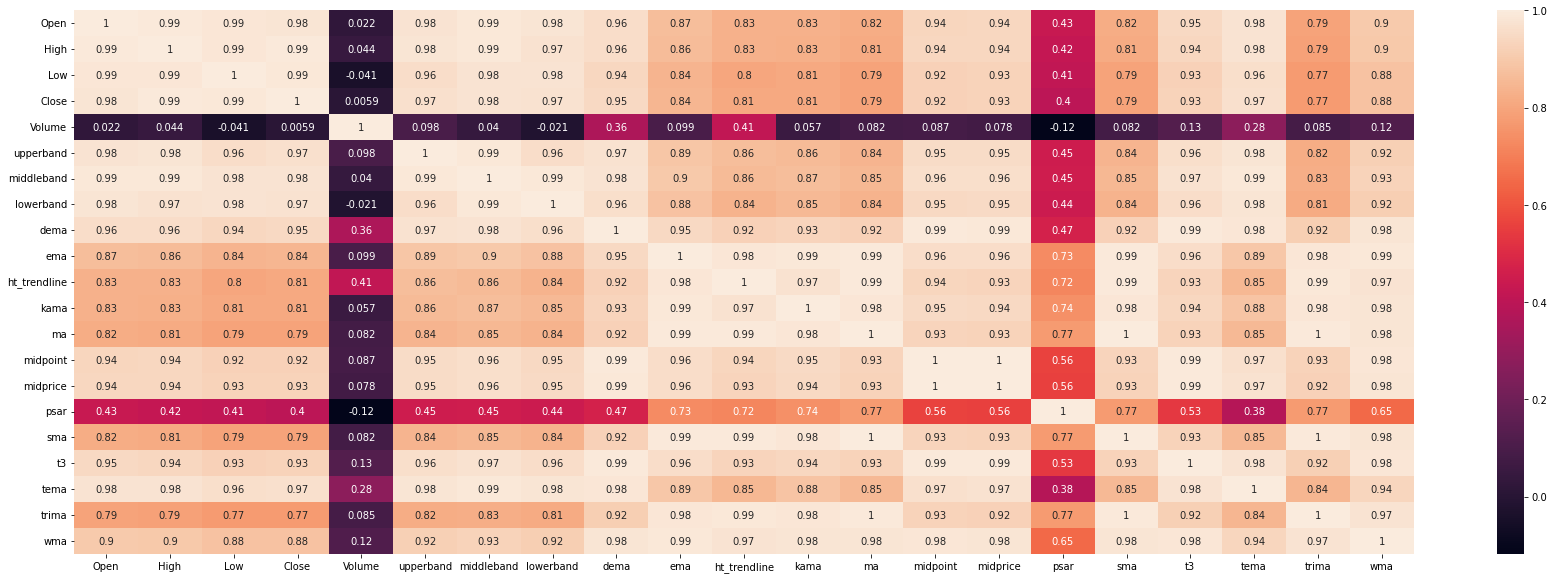

In [38]:
sns.heatmap(corr_trend, annot = True)

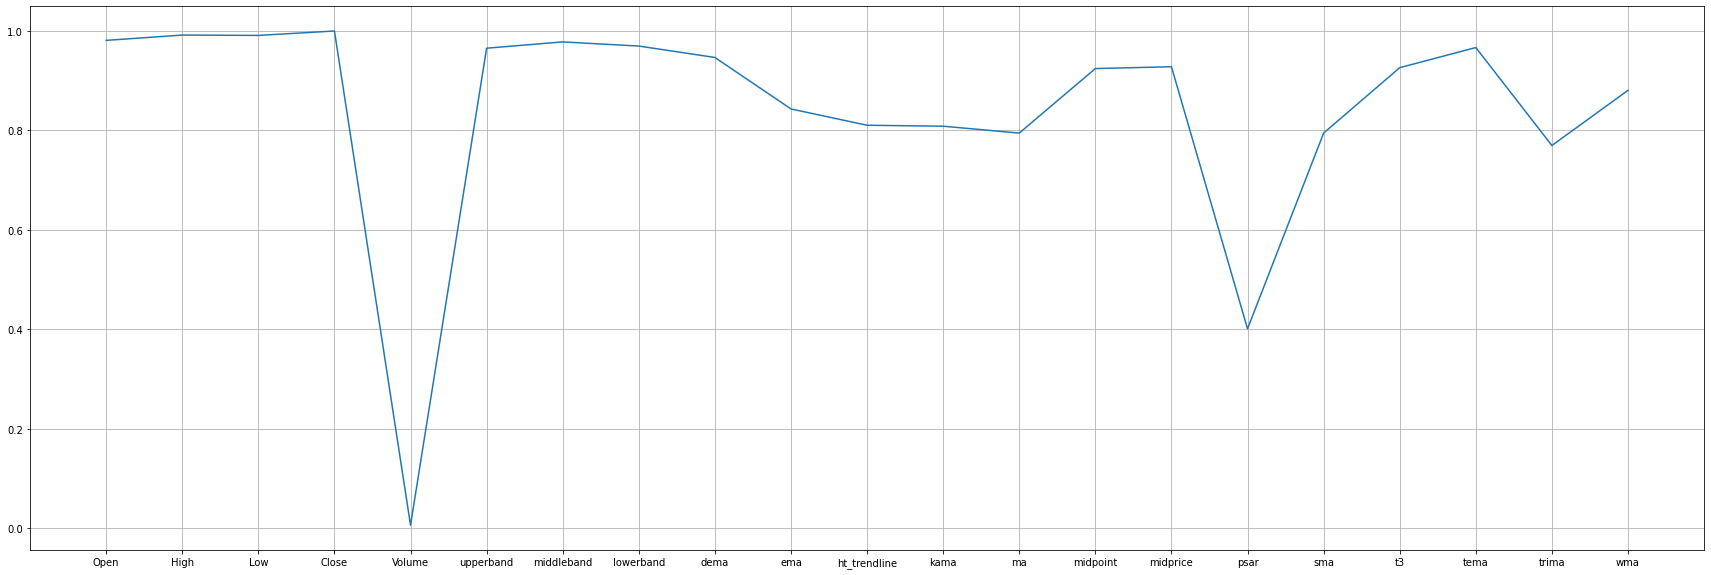

In [39]:
plt.plot(corr_trend["Close"])
plt.grid(True)

In [40]:
corr_trend = dict(corr_trend["Close"])

In [41]:
considerable_trend_indicators = {key: value for (key, value) in corr_trend.items() if ((value > 0.75 or value < -0.75) and value != 1.0) and key not in non_indicators}

In [42]:
considerable_trend_indicators

{'upperband': 0.9654175095293108,
 'middleband': 0.9780823028331714,
 'lowerband': 0.96970621019288,
 'dema': 0.9467725665556844,
 'ema': 0.843181335150987,
 'ht_trendline': 0.810420523046933,
 'kama': 0.8084671381101343,
 'ma': 0.7946639952668245,
 'midpoint': 0.9244281942952581,
 'midprice': 0.9281276467344276,
 'sma': 0.7946639952668245,
 't3': 0.9262085071429567,
 'tema': 0.966728714442426,
 'trima': 0.7696625595466146,
 'wma': 0.8806255356385737}

## Momemtum Indicators

<AxesSubplot:>

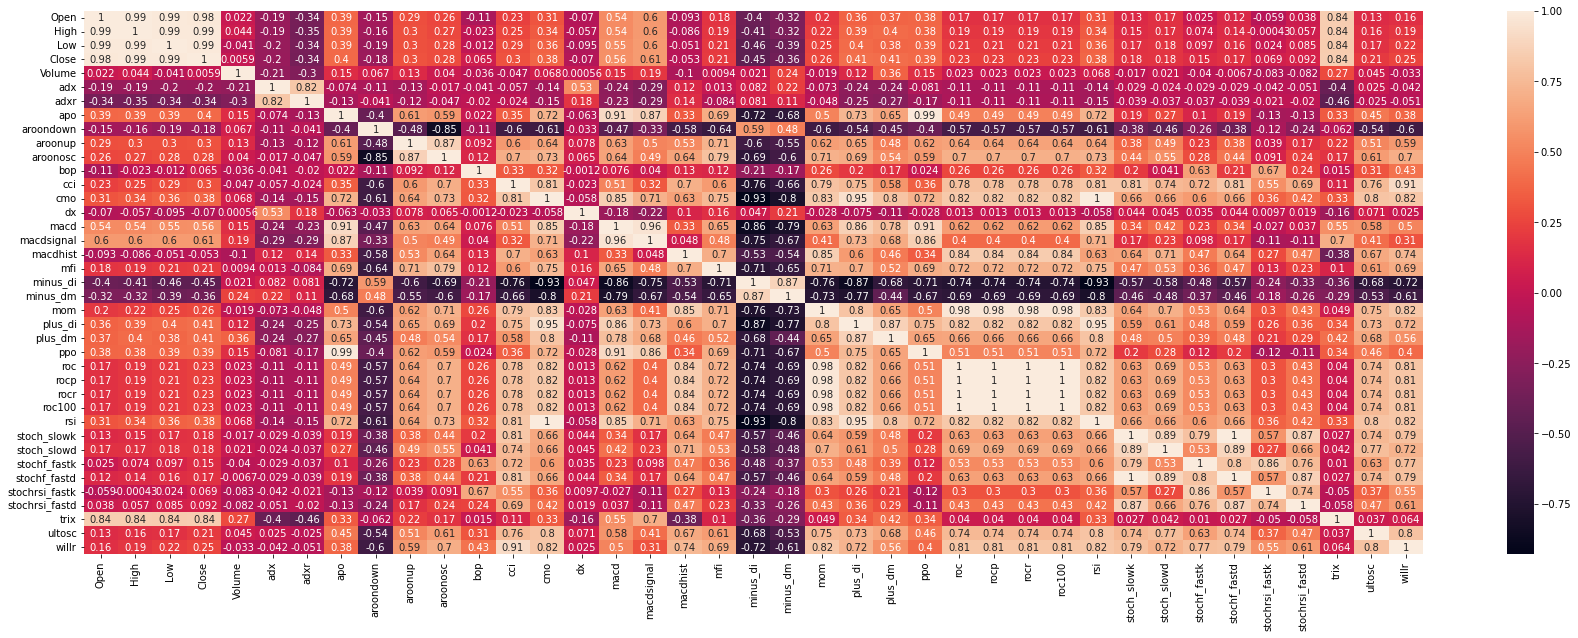

In [43]:
sns.heatmap(corr_momentum, annot = True)

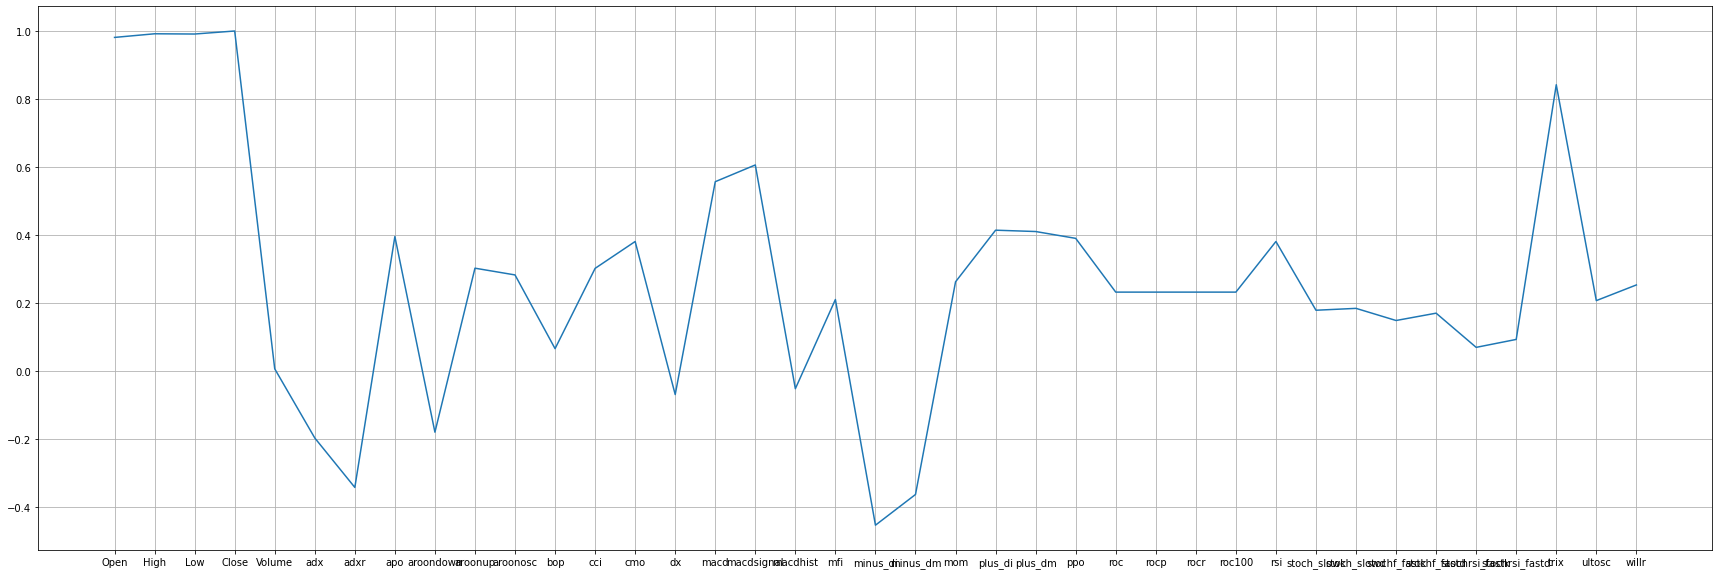

In [44]:
plt.plot(corr_momentum["Close"])
plt.grid(True)

In [45]:
corr_momentum = dict(corr_momentum["Close"])

In [46]:
considerable_momentum_indicators = {key: value for (key, value) in corr_momentum.items() if ((value > 0.3 or value < -0.2) and value != 1.0) and key not in non_indicators}

In [47]:
considerable_momentum_indicators

{'adxr': -0.3431381101174206,
 'apo': 0.39523574270607276,
 'aroonup': 0.3020217128518756,
 'cci': 0.3014971724670773,
 'cmo': 0.3805632002735068,
 'macd': 0.5565749970824497,
 'macdsignal': 0.6058030742949052,
 'minus_di': -0.45426211401454103,
 'minus_dm': -0.36389796084786463,
 'plus_di': 0.4138488967807644,
 'plus_dm': 0.40990992370503226,
 'ppo': 0.38980755957360685,
 'rsi': 0.3805632002735063,
 'trix': 0.8418823661878421}

## Volume Indicators

<AxesSubplot:>

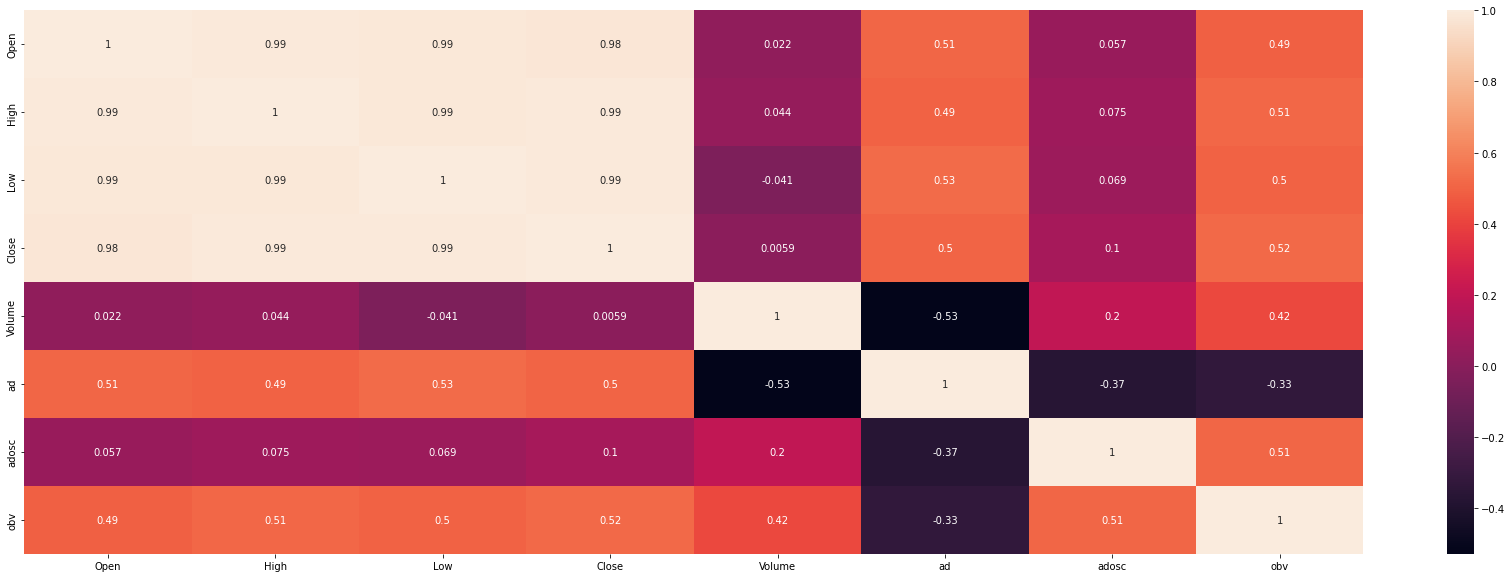

In [48]:
sns.heatmap(corr_volume, annot = True)

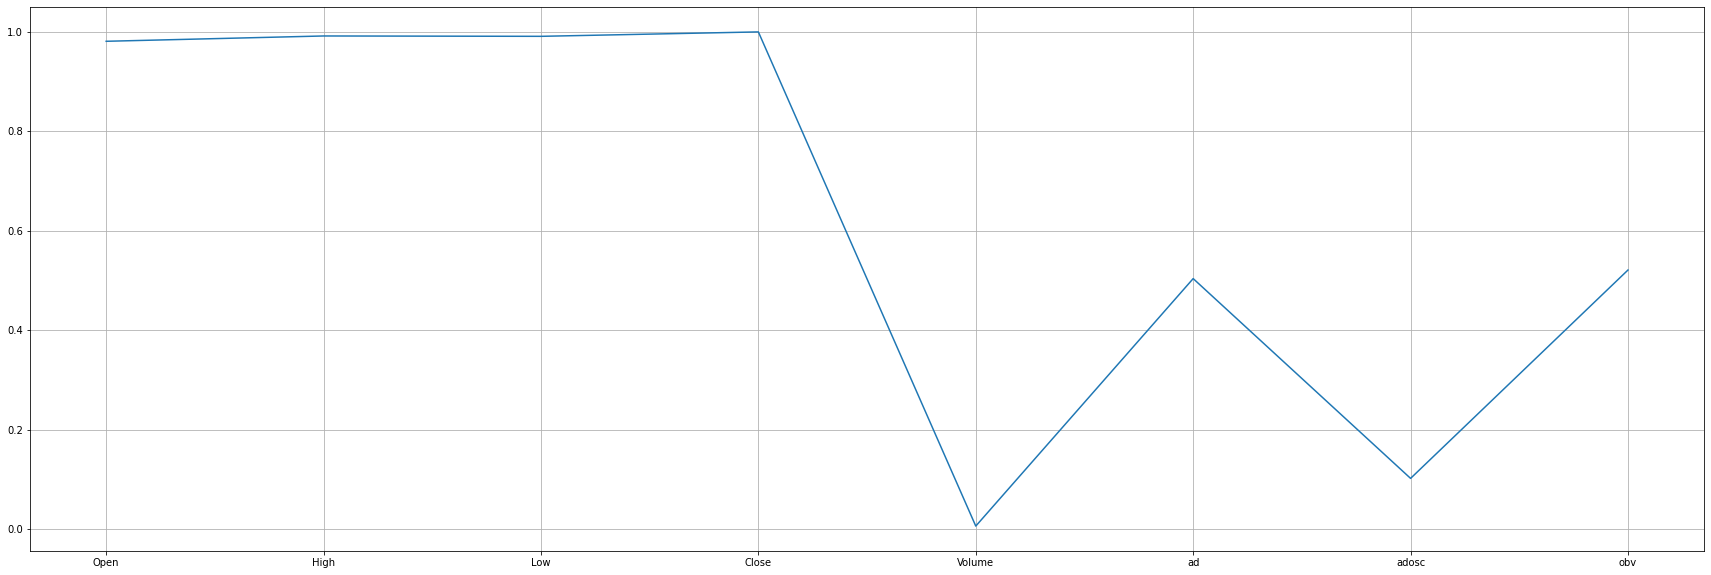

In [49]:
plt.plot(corr_volume["Close"])
plt.grid(True)

In [50]:
corr_volume = dict(corr_volume["Close"])

In [51]:
considerable_volume_indicators = {key: value for (key, value) in corr_volume.items() if ((value > 0.3 or value < -0.2) and value != 1.0) and key not in non_indicators}

In [52]:
considerable_volume_indicators

{'ad': 0.5037390134226395, 'obv': 0.5209940148160616}

## Volatility Indicators

<AxesSubplot:>

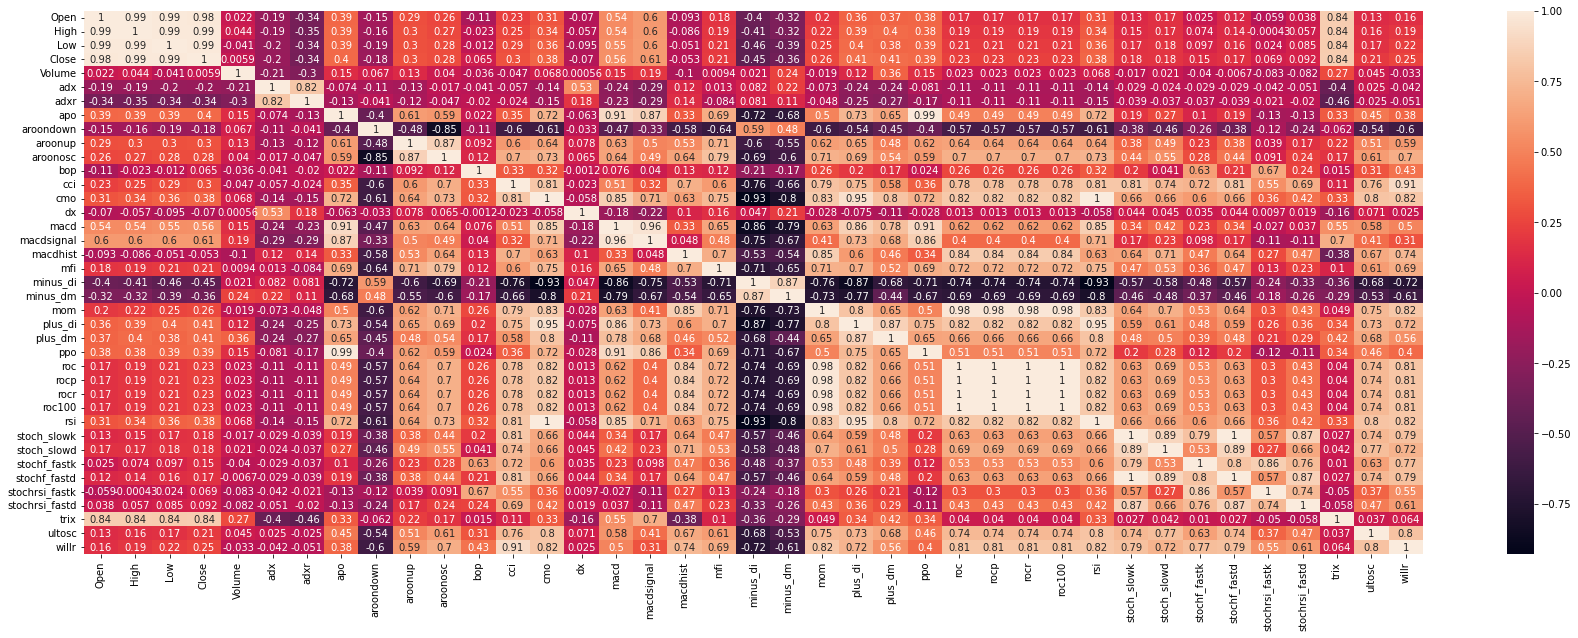

In [53]:
sns.heatmap(corr_volatility, annot = True)

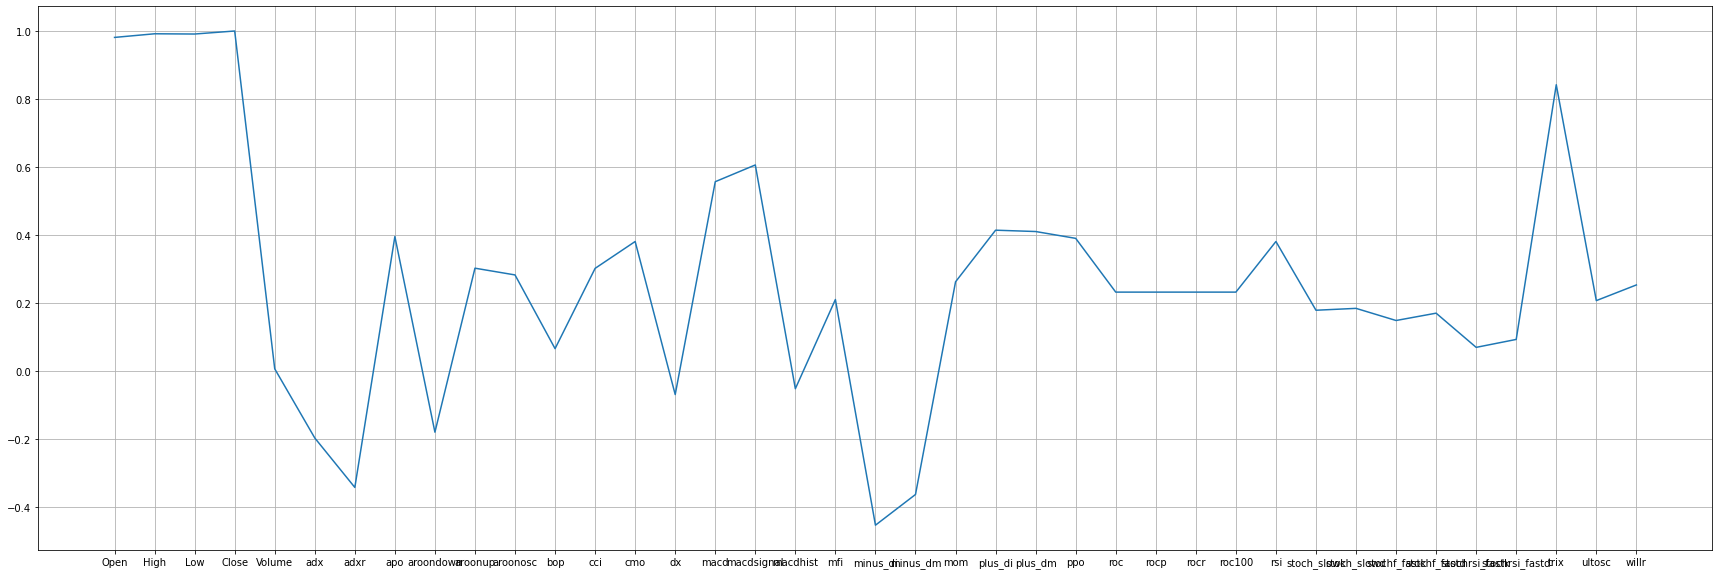

In [54]:
plt.plot(corr_volatility["Close"])
plt.grid(True)

In [55]:
corr_volatility = dict(corr_volatility["Close"])

In [56]:
considerable_volatility_indicators = {key: value for (key, value) in corr_volatility.items() if ((value > 0.3 or value < -0.2) and value != 1.0) and key not in non_indicators}

In [57]:
considerable_volatility_indicators

{'adxr': -0.3431381101174206,
 'apo': 0.39523574270607276,
 'aroonup': 0.3020217128518756,
 'cci': 0.3014971724670773,
 'cmo': 0.3805632002735068,
 'macd': 0.5565749970824497,
 'macdsignal': 0.6058030742949052,
 'minus_di': -0.45426211401454103,
 'minus_dm': -0.36389796084786463,
 'plus_di': 0.4138488967807644,
 'plus_dm': 0.40990992370503226,
 'ppo': 0.38980755957360685,
 'rsi': 0.3805632002735063,
 'trix': 0.8418823661878421}